In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:

AQ_Coffee=[f'{i:>02}' for i in range(1, 11)]
HQ_Coffee=[f'{i:>02}' for i in range(1, 21)]
LQ_Coffee=[f'{i:>02}' for i in range(1, 29)]

list_of_files=[AQ_Coffee,HQ_Coffee,LQ_Coffee]

list_of_folders=["AQ_Coffee","HQ_Coffee","LQ_Coffee"]
dsnew=None

for j in range(0,len(list_of_folders)):
    type_of_coffee=list_of_folders[j][0:2]
    for i in list_of_files[j] :
        ds=pd.read_csv(f'C:\\Users\\yiann\\Desktop\\ISENSE\\references\\dataset vocs on quality of coffee\\{list_of_folders[j]}\\{type_of_coffee}_{i}.txt',delimiter = '\s+',header=None,index_col=None)
        number_of_rows=ds.shape[0]
        ds["# of Sample"]=np.repeat(a = i, repeats = number_of_rows)
        ds["Type"]=np.repeat(a = type_of_coffee, repeats = number_of_rows)
        dsnew=pd.concat([dsnew, ds],axis=0)

    
        

In [3]:
dsnew.columns=['SP-12A', 'SP-31', 'TGS-813', 'TGS-842', 'SP-AQ3', 'TGS-823', 'ST-31', 'TGS-800','# of Sample','Type']


In [4]:
number_of_observations=dsnew.shape[0]
number_of_sensors=dsnew.shape[1]
dsnew

,SP-12A,SP-31,TGS-813,TGS-842,SP-AQ3,TGS-823,ST-31,TGS-800,# of Sample,Type
0,33.739782,72.056151,22.320113,22.949768,16.178617,45.594388,49.096439,33.202050,01,AQ
1,33.820116,73.356984,22.320113,22.867040,16.273621,46.149582,48.784078,33.046781,01,AQ
2,33.900787,73.356984,22.241104,22.825862,16.297507,45.732047,48.475323,33.202050,01,AQ
3,33.900787,72.377277,22.559946,23.074796,16.345442,46.149582,49.096439,33.437363,01,AQ
4,33.580114,72.056151,22.399587,22.908342,16.178617,45.732047,49.096439,33.202050,01,AQ
...,...,...,...,...,...,...,...,...,...,...
295,38.015842,68.112494,20.752591,19.155509,14.624870,41.670626,39.325789,26.576401,28,LQ
296,37.526539,67.541463,20.787797,19.279684,14.524122,41.438399,39.643703,26.629573,28,LQ
297,37.917076,68.112494,21.001092,19.405158,14.706232,42.261553,39.858209,26.682926,28,LQ
298,37.720909,66.979320,20.894000,19.342257,14.524122,41.554221,39.966242,26.629573,28,LQ


In [5]:
#dsnew=dsnew.reset_index(drop=True)
dsnew['index']=dsnew.index

dsnew_melt=pd.melt(dsnew, id_vars=['# of Sample', 'Type','index'], value_vars=['SP-12A', 'SP-31', 'TGS-813', 'TGS-842', 'SP-AQ3', 'TGS-823', 'ST-31', 'TGS-800'])

coffee_=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).mean()
coffee_

,# of Sample,Type,variable,index,value
0,01,AQ,SP-12A,149.5,33.097599
1,01,AQ,SP-31,149.5,55.170416
2,01,AQ,SP-AQ3,149.5,10.360386
3,01,AQ,ST-31,149.5,32.148122
4,01,AQ,TGS-800,149.5,20.495781
...,...,...,...,...,...
459,28,LQ,ST-31,149.5,35.800211
460,28,LQ,TGS-800,149.5,25.159739
461,28,LQ,TGS-813,149.5,21.128209
462,28,LQ,TGS-823,149.5,38.179033


In [6]:
dsnew_melt

,# of Sample,Type,index,variable,value
0,01,AQ,0,SP-12A,33.739782
1,01,AQ,1,SP-12A,33.820116
2,01,AQ,2,SP-12A,33.900787
3,01,AQ,3,SP-12A,33.900787
4,01,AQ,4,SP-12A,33.580114
...,...,...,...,...,...
139195,28,LQ,295,TGS-800,26.576401
139196,28,LQ,296,TGS-800,26.629573
139197,28,LQ,297,TGS-800,26.682926
139198,28,LQ,298,TGS-800,26.629573


Text(0.5, 1.0, 'all runs for patients for each sensor')

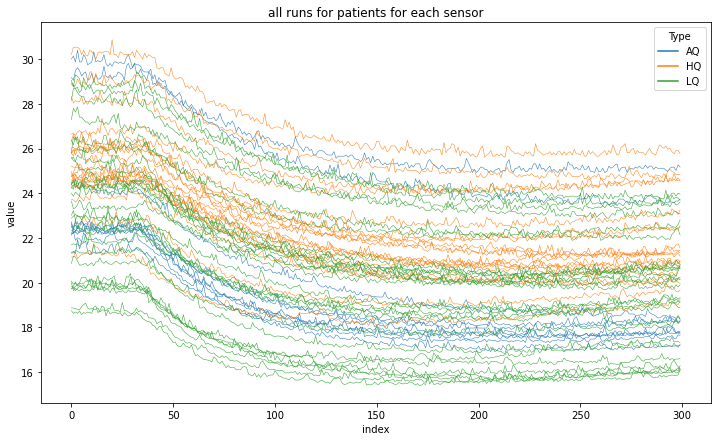

In [7]:
plt.figure(figsize=(12,7))
sns.lineplot(
    data=dsnew_melt[dsnew_melt.variable=='TGS-813'],
    x="index", y="value", hue="Type",units="# of Sample",
    estimator=None, lw=0.5)
plt.title ("all runs for the sensor TGS-813")

In [8]:
Sensor=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).mean()['variable']
Sample=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).mean()['# of Sample']
Type=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).mean().Type
average=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).mean().value
variance=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).var().value
median=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).median().value
kurtosis=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).apply(pd.DataFrame.kurt).value
skewness=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).skew().value
minimum=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).min().value
maximum=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).max().value
quart1=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).quantile(0.25).value
quart3=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).quantile(0.75).value

df_features = pd.concat([Sample,Type,Sensor,average,variance,median,kurtosis,skewness,minimum,maximum,quart1,quart3],axis=1)
df_features.columns=['# of Sample','Type','Sensor','aver','var','med','kurt','skew','min','max','quart1','quart3']


#df_features  = pd.DataFrame(pd.concat([Sample,Type,Sensor,average,variance,median,kurtosis,skewness,minimum,maximum,quart1,quart3],axis=1), columns=['# of Sample','Type','Sensor','average','variance','median','kurtosis','skewness','minimum','maximum','quart1','quart3'])
df_features


C:\Users\yiann\AppData\Local\Temp\ipykernel_16236\1918386645.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis=dsnew_melt.groupby(['# of Sample','Type','variable'], as_index=False).apply(pd.DataFrame.kurt).value


,# of Sample,Type,Sensor,aver,var,med,kurt,skew,min,max,quart1,quart3
0,01,AQ,SP-12A,33.097599,0.226369,33.031573,-1.105878,0.390568,32.348989,34.144839,32.649286,33.500777
1,01,AQ,SP-31,55.170416,50.509375,52.510857,2.164559,1.937032,49.964542,73.689111,51.124017,54.725317
2,01,AQ,SP-AQ3,10.360386,5.986649,9.996093,1.630135,1.441627,6.708708,16.563890,9.269550,10.486336
3,01,AQ,ST-31,32.148122,39.329164,30.161561,2.836472,2.028822,26.083846,49.732237,28.829151,32.130479
4,01,AQ,TGS-800,20.495781,24.518350,19.195413,2.381923,1.912355,15.261210,33.755698,18.207774,20.029110
...,...,...,...,...,...,...,...,...,...,...,...,...
459,28,LQ,ST-31,35.800211,51.269508,34.543104,1.353314,1.312195,25.331123,54.451036,31.373243,38.024049
460,28,LQ,TGS-800,25.159739,42.673513,23.685843,1.866930,1.638576,16.949635,42.285898,21.674898,25.711873
461,28,LQ,TGS-813,21.128209,1.905056,20.474411,0.151125,1.283256,19.870204,24.457869,20.168638,21.550281
462,28,LQ,TGS-823,38.179033,43.839697,37.047799,1.207239,1.272795,28.537906,55.444606,33.980396,40.201610


## Exploratory data Analysis

Text(0.5, 1.0, 'Sensor SP-12A. Features in coffee beans of different quality')

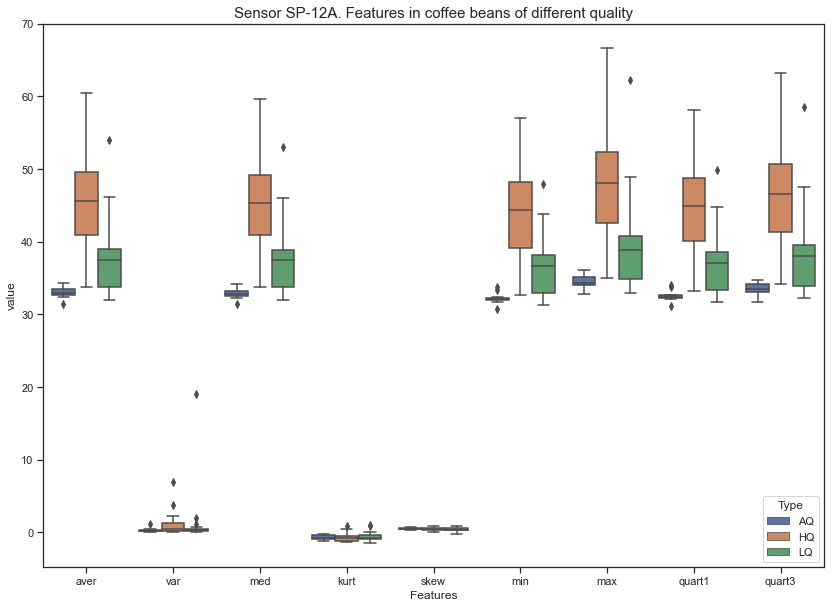

In [9]:
Features_melt=pd.melt(df_features, id_vars=['# of Sample','Type','Sensor'],value_vars=['aver','var','med','kurt','skew','min','max','quart1','quart3'],var_name='Features')

list_of_Sensors=['SP-12A', 'SP-31', 'TGS-813', 'TGS-842', 'SP-AQ3', 'TGS-823', 'ST-31', 'TGS-800']

Sensor1=Features_melt[Features_melt["Sensor"] == list_of_Sensors[0]]
Sensor2=Features_melt[Features_melt["Sensor"] == list_of_Sensors[1]]
Sensor3=Features_melt[Features_melt["Sensor"] == list_of_Sensors[2]]
Sensor4=Features_melt[Features_melt["Sensor"] == list_of_Sensors[3]]
Sensor5=Features_melt[Features_melt["Sensor"] == list_of_Sensors[4]]
Sensor6=Features_melt[Features_melt["Sensor"] == list_of_Sensors[5]]
Sensor7=Features_melt[Features_melt["Sensor"] == list_of_Sensors[6]]
Sensor8=Features_melt[Features_melt["Sensor"] == list_of_Sensors[7]]

plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="deep")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Features', y="value",
            hue="Type", palette="deep",
            data=Sensor1).set_title(f'Sensor {list_of_Sensors[0]}. Features in coffee beans of different quality',fontsize=15)
#sns.despine(offset=10, trim=True)



Text(0.5, 1.0, 'Sensor SP-31. Features in coffee beans of different quality')

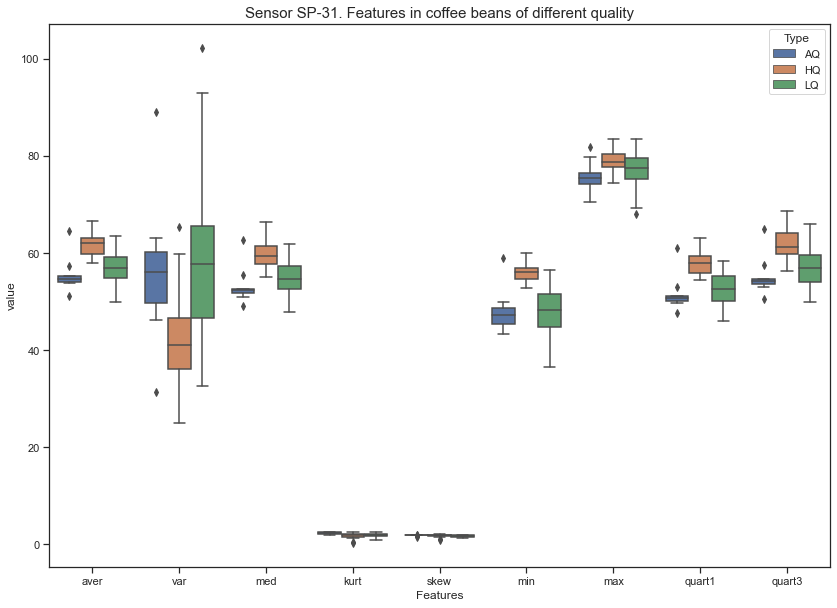

In [10]:
plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="deep")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Features', y="value",
            hue="Type", palette="deep",
            data=Sensor2).set_title(f'Sensor {list_of_Sensors[1]}. Features in coffee beans of different quality',fontsize=15)
#sns.despine(offset=10, trim=True)




Text(0.5, 1.0, 'Sensor TGS-813. Features in coffee beans of different quality')

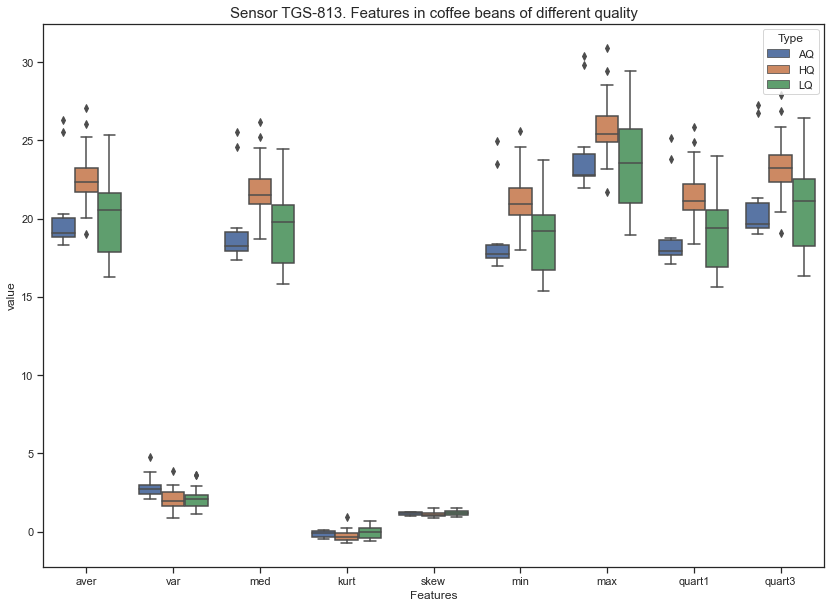

In [11]:
plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="deep")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Features', y="value",
            hue="Type", palette="deep",
            data=Sensor3).set_title(f'Sensor {list_of_Sensors[2]}. Features in coffee beans of different quality',fontsize=15)
#sns.despine(offset=10, trim=True)


Text(0.5, 1.0, 'Sensor TGS-842. Features in coffee beans of different quality')

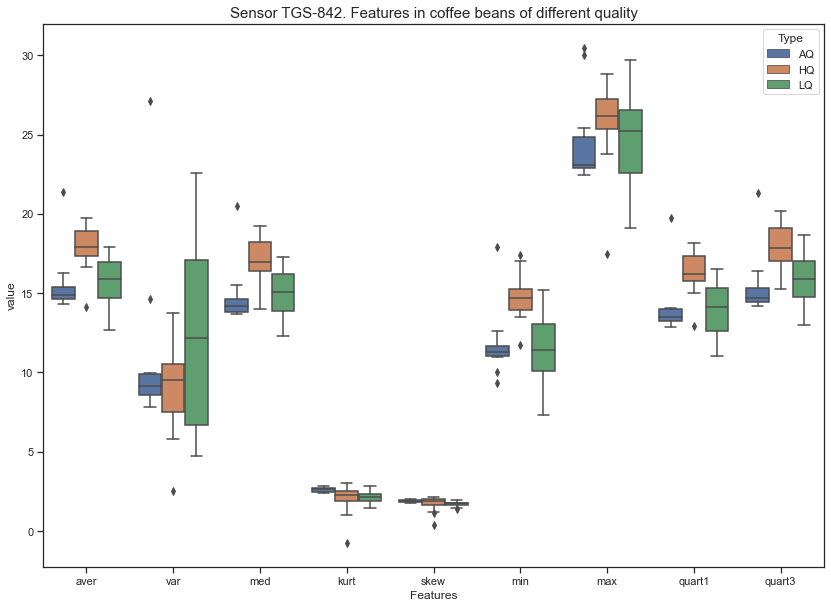

In [12]:
plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="deep")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Features', y="value",
            hue="Type", palette="deep",
            data=Sensor4).set_title(f'Sensor {list_of_Sensors[3]}. Features in coffee beans of different quality',fontsize=15)
#sns.despine(offset=10, trim=True)


Text(0.5, 1.0, 'Sensor SP-AQ3. Features in coffee beans of different quality')

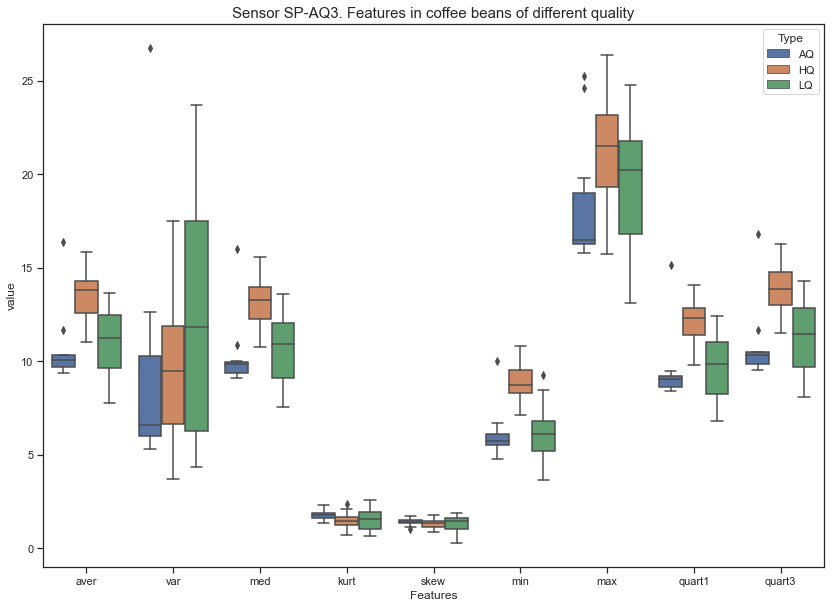

In [13]:
plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="deep")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Features', y="value",
            hue="Type", palette="deep",
            data=Sensor5).set_title(f'Sensor {list_of_Sensors[4]}. Features in coffee beans of different quality',fontsize=15)
#sns.despine(offset=10, trim=True)


Text(0.5, 1.0, 'Sensor TGS-823. Features in coffee beans of different quality')

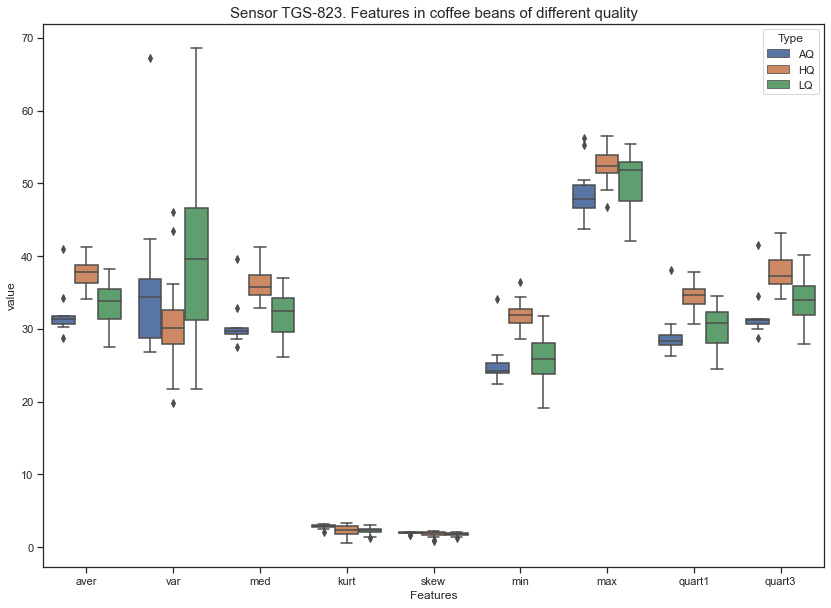

In [14]:
plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="deep")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Features', y="value",
            hue="Type", palette="deep",
            data=Sensor6).set_title(f'Sensor {list_of_Sensors[5]}. Features in coffee beans of different quality',fontsize=15)
#sns.despine(offset=10, trim=True)


Text(0.5, 1.0, 'Sensor ST-31. Features in coffee beans of different quality')

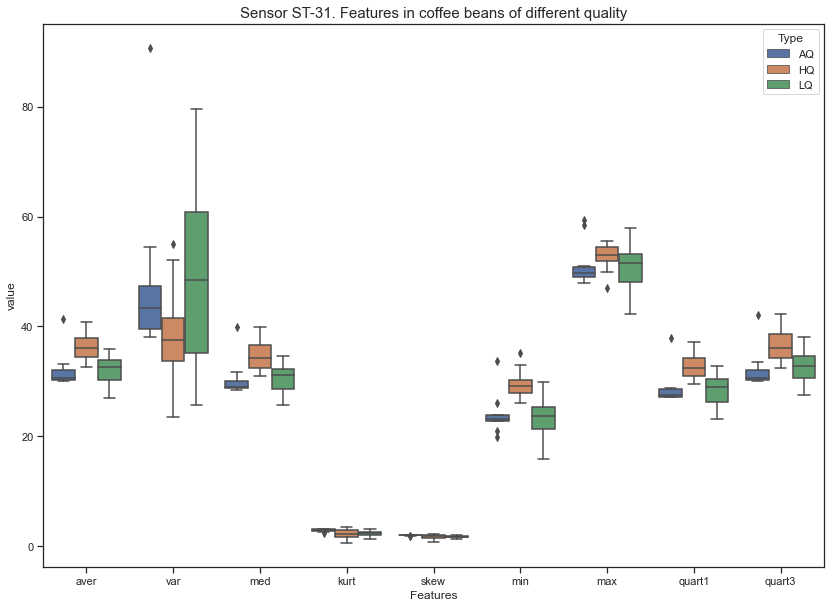

In [15]:
plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="deep")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Features', y="value",
            hue="Type", palette="deep",
            data=Sensor7).set_title(f'Sensor {list_of_Sensors[6]}. Features in coffee beans of different quality',fontsize=15)
#sns.despine(offset=10, trim=True)


Text(0.5, 1.0, 'Sensor TGS-800. Features in coffee beans of different quality')

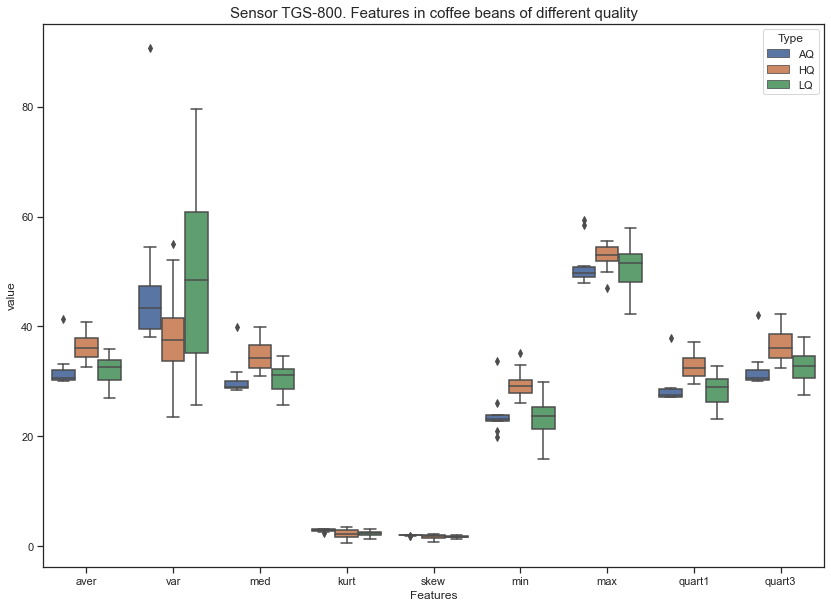

In [16]:
plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="deep")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Features', y="value",
            hue="Type", palette="deep",
            data=Sensor7).set_title(f'Sensor {list_of_Sensors[7]}. Features in coffee beans of different quality',fontsize=15)
#sns.despine(offset=10, trim=True)


## for PCA we go from the long to a wide format

In [17]:
df_wide=pd.pivot(df_features, index=['# of Sample','Type'], columns="Sensor", values=['aver','var','med','kurt','skew','min','max','quart1','quart3'])
#cols = df_features['Sensor'].unique()
#df_wide=df_wide[cols]
df_wide.reset_index(inplace=True)

df_wide.columns = [' '.join(col).strip() for col in df_wide.columns.values]

In [18]:
df_wide

,# of Sample,Type,aver SP-12A,aver SP-31,aver SP-AQ3,aver ST-31,aver TGS-800,aver TGS-813,aver TGS-823,aver TGS-842,...,quart1 TGS-823,quart1 TGS-842,quart3 SP-12A,quart3 SP-31,quart3 SP-AQ3,quart3 ST-31,quart3 TGS-800,quart3 TGS-813,quart3 TGS-823,quart3 TGS-842
0,01,AQ,33.097599,55.170416,10.360386,32.148122,20.495781,19.204738,31.435407,15.412578,...,28.537906,14.013508,33.500777,54.725317,10.486336,32.130479,20.029110,19.911232,31.280147,15.233136
1,01,HQ,33.991270,62.307040,13.833532,34.622588,25.860256,22.612481,38.071217,17.844069,...,34.809815,16.087623,34.391998,61.624914,13.847263,34.293739,24.006432,23.574274,37.647522,17.489401
2,01,LQ,39.277533,61.262759,12.023539,33.924643,23.350771,19.623803,35.797054,16.950555,...,31.960227,15.179393,39.875309,63.528368,12.762522,35.927614,23.884024,19.993752,37.720601,17.603550
3,02,AQ,33.627068,51.193028,9.390676,30.069460,19.588386,18.462560,28.757508,14.796892,...,26.287982,13.536615,34.726476,50.621131,9.558527,30.030120,19.203169,19.031686,28.673382,14.626853
4,02,HQ,42.935231,65.093262,15.868628,37.968560,27.114568,27.036099,39.781827,19.070267,...,36.304551,17.063544,43.237317,66.152319,16.249789,39.220828,26.313225,27.915687,40.867880,19.350110
5,02,LQ,35.527839,58.024453,10.750106,33.047806,20.759493,23.252805,35.225940,15.898000,...,31.105351,13.636436,35.676517,59.711683,11.003727,34.397215,19.766457,23.836996,36.418973,16.276934
6,03,AQ,32.891695,53.805443,10.076651,31.507424,20.568264,19.322605,30.574232,15.254252,...,27.934515,13.904864,33.421767,53.597065,10.448902,31.820155,20.571704,20.043423,30.846295,15.363355
7,03,HQ,46.498241,59.093273,12.485612,35.674661,24.487710,21.904679,36.248150,17.428870,...,33.499251,15.947866,47.887474,58.605034,12.627128,35.927614,23.917276,22.814352,36.327415,17.330233
8,03,LQ,37.520887,56.676905,9.491097,31.759121,20.726025,16.814798,31.398976,15.503645,...,28.240797,14.109015,38.139987,56.911376,9.759813,32.577633,20.331417,17.270302,32.069966,15.584207
9,04,AQ,32.646912,55.152155,10.083829,30.783449,19.574836,18.866255,31.427597,14.664797,...,28.597973,13.322581,33.031573,54.534252,10.304050,30.561924,19.327833,19.443722,31.210024,14.466039


Text(0.5, 1.0, 'Correlation among Sensors')

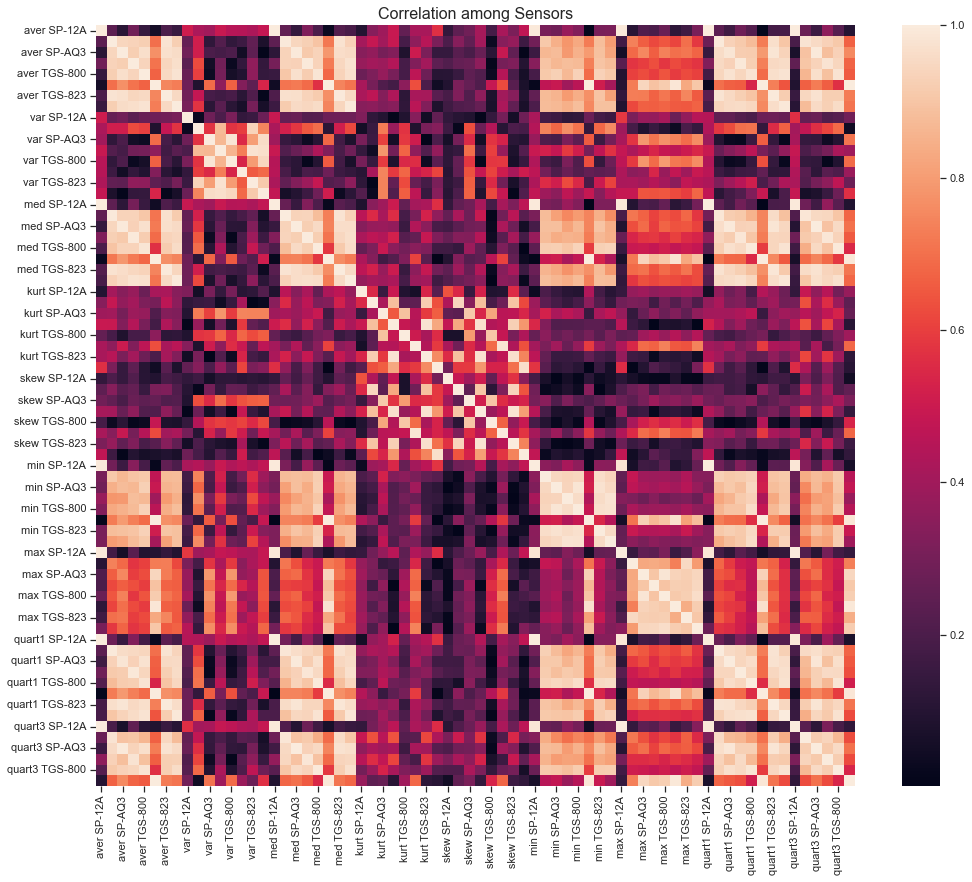

In [19]:
corrma=df_wide.iloc[:,2:72].corr()
plt.figure(figsize=(17,14))
sns.heatmap(corrma.abs(), annot=False).set_title ("Correlation among Sensors", fontsize=16)

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = df_wide.iloc[:,2:74 ]
x = StandardScaler().fit_transform(x)
x.shape
pca = PCA(n_components=5)
PrinComp = pca.fit_transform(x)

In [21]:
pca.explained_variance_ratio_.sum()

0.9305907215576522

### 5 components account for the 93% of the variance observed in the dataset

In [22]:
df_pca  = pd.DataFrame(PrinComp, columns=["Pc1","Pc2","Pc3","Pc4","Pc5"])
Pca_dataset=pd.concat([df_wide.iloc[:,0:2],df_pca],axis=1)
#Pca_dataset


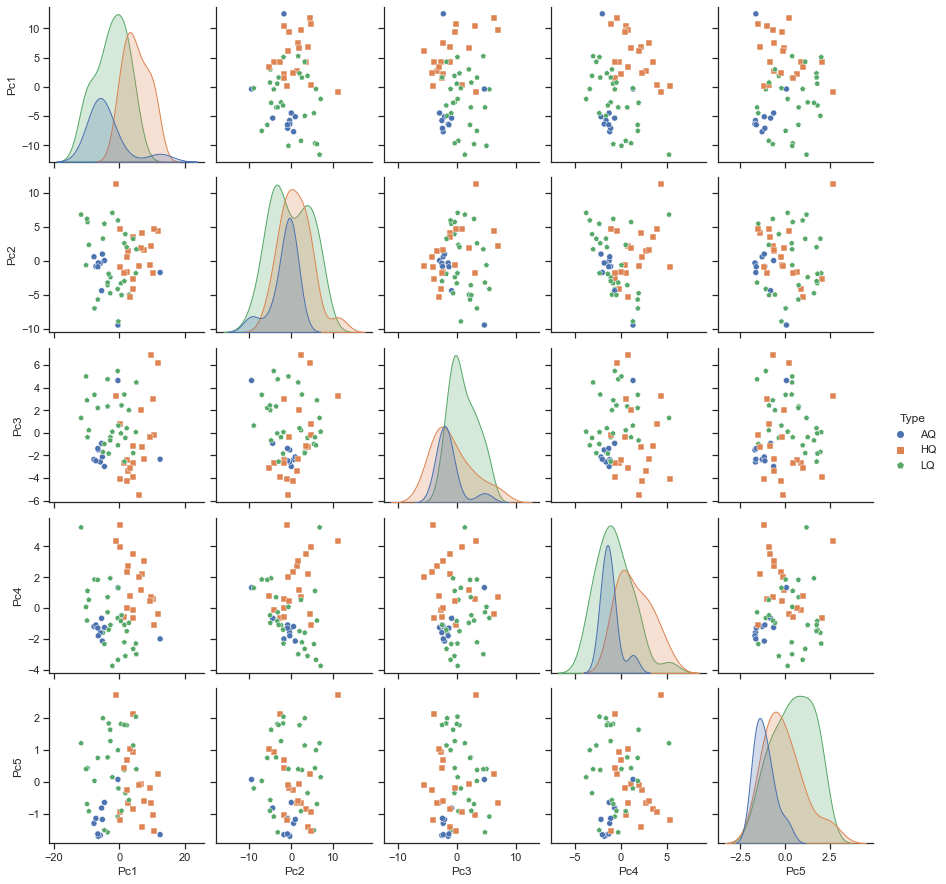

In [23]:
sns.pairplot(Pca_dataset, hue="Type", markers=["o", "s","p"],palette="deep")

Text(0.5, 0.92, '3d plot AQ HQ and LQ coffee beans')

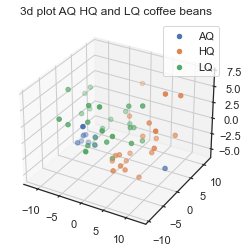

In [24]:
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for s in Pca_dataset.Type.unique():
    ax.scatter(Pca_dataset.Pc1[Pca_dataset.Type==s],Pca_dataset.Pc2[Pca_dataset.Type==s],Pca_dataset.Pc3[Pca_dataset.Type==s],label=s)
    
ax.legend()
ax.set_title("3d plot AQ HQ and LQ coffee beans")


In [25]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=5,n_neighbors=5)
x = df_wide.iloc[:,2:72 ]
x = StandardScaler().fit_transform(x)
X_transformed = embedding.fit_transform(x)

In [26]:
df_iso  = pd.DataFrame(X_transformed, columns=["eig1","eig2","eig3","eig4","eig5"])

In [27]:
df_iso=pd.concat([df_wide.iloc[:,0:2],df_iso],axis=1)

## Application of isomap

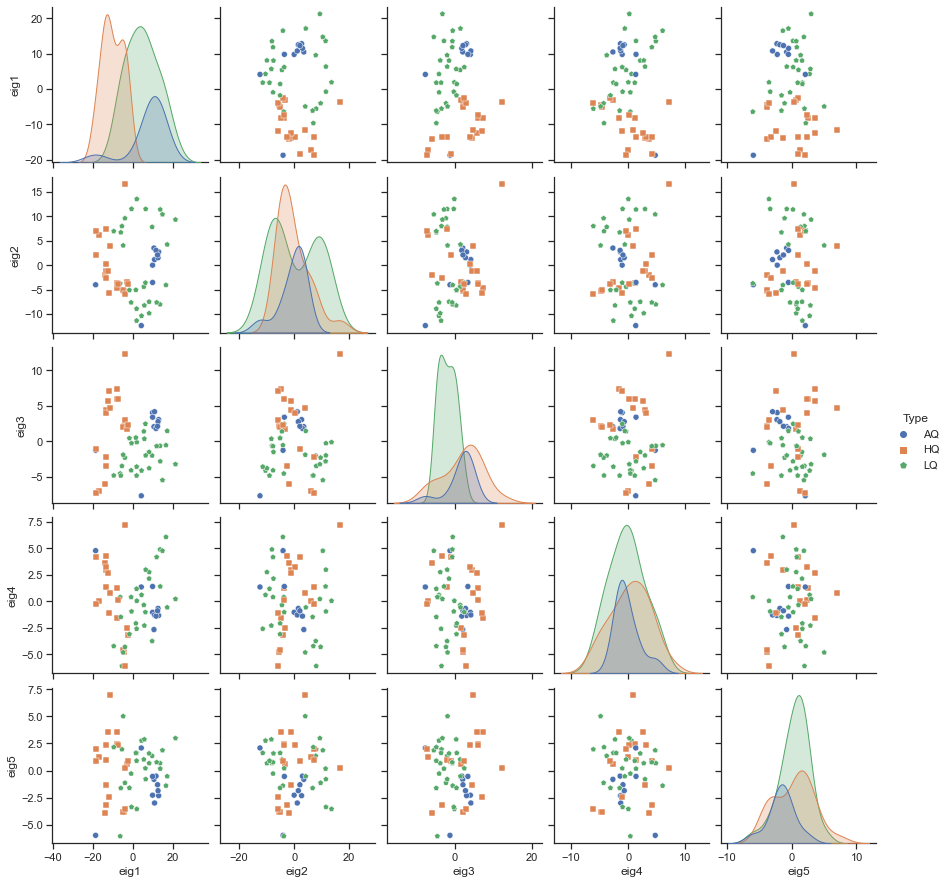

In [28]:
sns.pairplot(df_iso, hue="Type", markers=["o", "s","p"],palette="deep",height=2.5,aspect=1)

## Lets do a PCA directly to the output of the sensors

In [32]:
PC_Coordinates=pd.DataFrame(columns=["Pc1","Pc2","Pc3","Pc4","Pc5","Type","# of Sample"])
#PC_Coordinates=pd.DataFrame(columns=["Pc1","Pc2","Type","# of Sample"])


In [33]:


for j in range(0,len(list_of_folders)):
    type_of_coffee=list_of_folders[j][0:2]
    for i in list_of_files[j] :
                print (f'{type_of_coffee}_{i}')
                dat=dsnew[(dsnew['Type']==type_of_coffee) & (dsnew['# of Sample']==i)]
                x = StandardScaler().fit_transform(dat.iloc[:,0:8])
                print(x.shape)
                #x=dat.iloc[:,0:8]
                pca = PCA(n_components=5)
                PrinComp = pca.fit_transform(x)
                number_of_rows=PrinComp.shape[0]
                print(pca.explained_variance_ratio_.sum())
                PC_Coords_new=pd.DataFrame(PrinComp,columns=["Pc1","Pc2","Pc3","Pc4","Pc5"])
                PC_Coords_new["Type"]=np.repeat(a = type_of_coffee, repeats = number_of_rows)
                PC_Coords_new["# of Sample"]=np.repeat(a = i, repeats = number_of_rows)
                PC_Coordinates=pd.concat([PC_Coordinates,PC_Coords_new],axis=0)
                
                
                
                
                
            

AQ_01
(300, 8)
0.9995362341642475
AQ_02
(300, 8)
0.9996773691817306
AQ_03
(300, 8)
0.9995190213879224
AQ_04
(300, 8)
0.9996659443014192
AQ_05
(300, 8)
0.9996794789112362
AQ_06
(300, 8)
0.9997182824496975
AQ_07
(300, 8)
0.999690504400334
AQ_08
(300, 8)
0.9990306289066762
AQ_09
(300, 8)
0.9997532950843926
AQ_10
(300, 8)
0.9997153394509498
HQ_01
(300, 8)
0.9994355025484689
HQ_02
(300, 8)
0.999413879913078
HQ_03
(300, 8)
0.999245451677434
HQ_04
(300, 8)
0.9992295663773402
HQ_05
(300, 8)
0.9994410455372262
HQ_06
(300, 8)
0.999300506554537
HQ_07
(300, 8)
0.9991158409872154
HQ_08
(300, 8)
0.999568478584018
HQ_09
(300, 8)
0.9993360949704823
HQ_10
(300, 8)
0.9991069489981885
HQ_11
(300, 8)
0.9995561768781185
HQ_12
(300, 8)
0.9994271357825284
HQ_13
(300, 8)
0.9990536612002787
HQ_14
(300, 8)
0.999241565365371
HQ_15
(300, 8)
0.9993855118997677
HQ_16
(300, 8)
0.9991552306834202
HQ_17
(300, 8)
0.9992992614553948
HQ_18
(300, 8)
0.9994102690896071
HQ_19
(300, 8)
0.9994570688507196
HQ_20
(300, 8)
0.998

In [34]:
PC_Coordinates['index']=PC_Coordinates.index


In [35]:
PC_Coordinates

,Pc1,Pc2,Pc3,Pc4,Pc5,Type,# of Sample,index
0,6.688945,-0.024238,-0.011951,-0.25028,0.080162,AQ,01,0
1,6.805798,0.092852,-0.065434,-0.141992,-0.057285,AQ,01,1
2,6.788476,0.201844,-0.195655,-0.043113,-0.06156,AQ,01,2
3,6.9216,0.263997,-0.14158,-0.227566,0.103214,AQ,01,3
4,6.637824,-0.241301,0.231781,-0.30597,0.135178,AQ,01,4
...,...,...,...,...,...,...,...,...
295,1.026216,-0.217344,-0.529266,0.141855,-0.289805,LQ,28,295
296,0.803073,-0.974964,0.212702,-0.055873,-0.229295,LQ,28,296
297,1.137233,-0.307738,-0.289882,-0.005035,-0.276935,LQ,28,297
298,0.909276,-0.630055,-0.052726,-0.098622,-0.197151,LQ,28,298


In [36]:
PC_Coordinates=PC_Coordinates.reset_index(drop=True)

In [37]:
PC_Coordinates

,Pc1,Pc2,Pc3,Pc4,Pc5,Type,# of Sample,index
0,6.688945,-0.024238,-0.011951,-0.25028,0.080162,AQ,01,0
1,6.805798,0.092852,-0.065434,-0.141992,-0.057285,AQ,01,1
2,6.788476,0.201844,-0.195655,-0.043113,-0.06156,AQ,01,2
3,6.9216,0.263997,-0.14158,-0.227566,0.103214,AQ,01,3
4,6.637824,-0.241301,0.231781,-0.30597,0.135178,AQ,01,4
...,...,...,...,...,...,...,...,...
17395,1.026216,-0.217344,-0.529266,0.141855,-0.289805,LQ,28,295
17396,0.803073,-0.974964,0.212702,-0.055873,-0.229295,LQ,28,296
17397,1.137233,-0.307738,-0.289882,-0.005035,-0.276935,LQ,28,297
17398,0.909276,-0.630055,-0.052726,-0.098622,-0.197151,LQ,28,298


Text(0.5, 1.0, 'on Principal component 5')

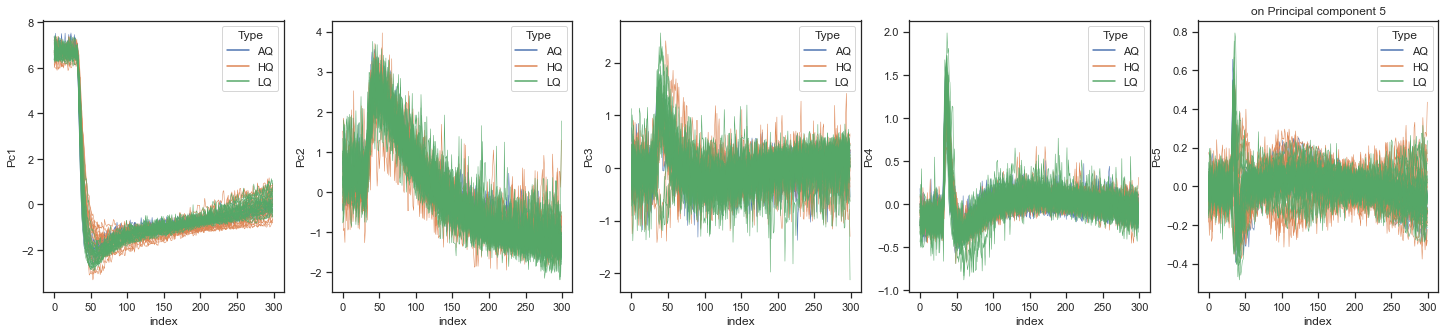

In [42]:
fig, axes = plt.subplots(1, 5,figsize=(25,5))

sns.lineplot(ax=axes[0],
    data=PC_Coordinates,
    x="index", y="Pc1", hue="Type",units="# of Sample",
    estimator=None, lw=0.5)
plt.title ("on Principal component 1")

sns.lineplot(ax=axes[1],
    data=PC_Coordinates,
    x="index", y="Pc2", hue="Type",units="# of Sample",
    estimator=None, lw=0.5)
plt.title ("on Principal component 2")

sns.lineplot(ax=axes[2],
    data=PC_Coordinates,
    x="index", y="Pc3", hue="Type",units="# of Sample",
    estimator=None, lw=0.5)
plt.title ("on Principal component 3")

sns.lineplot(ax=axes[3],
    data=PC_Coordinates,
    x="index", y="Pc4", hue="Type",units="# of Sample",
    estimator=None, lw=0.5)
plt.title ("on Principal component 4")

sns.lineplot(ax=axes[4],
    data=PC_Coordinates,
    x="index", y="Pc5", hue="Type",units="# of Sample",
    estimator=None, lw=0.5)
plt.title ("on Principal component 5")

In [39]:
pc_melt=pd.melt(PC_Coordinates, id_vars=['# of Sample', 'Type','index'], value_vars=['Pc1', 'Pc2'])
pc_melt["value"] = pc_melt.value.astype(float)

In [40]:
pc_melt


,# of Sample,Type,index,variable,value
0,01,AQ,0,Pc1,6.688945
1,01,AQ,1,Pc1,6.805798
2,01,AQ,2,Pc1,6.788476
3,01,AQ,3,Pc1,6.921600
4,01,AQ,4,Pc1,6.637824
...,...,...,...,...,...
34795,28,LQ,295,Pc2,-0.217344
34796,28,LQ,296,Pc2,-0.974964
34797,28,LQ,297,Pc2,-0.307738
34798,28,LQ,298,Pc2,-0.630055
